In [1]:
import pantompkins as pt
import numpy as np
import matplotlib.pyplot as plt
import ast
import pandas as pd

In [2]:
def checker():
    if z<10:
        num = f'00{z}'
    elif z>=10 and z<100:
        num = f"0{z}"
    elif z>=100:
        num = f"{z}"
    return num

In [3]:
def splitter_annote(res):
    df = []
    tz = []
    for i in res:
        if i[1] - i[0] > 180:
            tz.append(i)
            rng = int((i[1] - i[0]) / 180)
            # print(rng)
            if rng == 1 :
                df.append([i[0], i[0]+180, i[2]])
            else:
                # cp = i
                z=1
                for item in range(rng):
                    if z == 1:
                        df.append([i[0], i[0] + 180, i[2]])
                    else:
                        df.append([df[-1][1], df[-1][1]+180, i[2]])
                    z+=1
    return df

In [4]:
def splitter(annot, rpeaks):
    points = []
    start = annot[0]
    end = annot[1]
    for i in rpeaks:
        if i >= start and i <= end:
            points.append(i)
        else:
            pass
    return points

In [5]:
def lister(arr):
    tmp =[]
    for item in arr:
        tmp.append(item)
    return tmp

In [8]:
def logger(name):
    with open('Output/Log.txt', 'a') as file:
        file.write(f'Log for SN{name} = Min : {np.min(HRV)} , Max : {np.max(HRV)} , Mean : {np.mean(HRV)} , Std : {np.std(HRV)}, Var : {np.var(HRV)}\n')

In [9]:
def whole_log(name):
    with open('Output/Whole_Log.csv', 'a') as file:
        file.write(f'SN{name},{np.min(HRV)},{np.max(HRV)},{np.mean(HRV)},{np.std(HRV)},{np.var(HRV)}\n')

In [10]:
def splitted_log(name):
    with open('Output/Splitted_Log.csv', 'a') as file:
        file.write(f'SN{name} - Number {i+1},{np.min(partial_pts)},{np.max(partial_pts)},{np.mean(partial_pts)},{np.std(partial_pts)},{np.var(partial_pts)}\n')

In [12]:
def whole_hrv(name,points):
    hrv_df = {'File':[f'SN{name}'] , 'Points':[f'{lister(points)}']}
    df = pd.DataFrame(hrv_df)
    df.to_csv('Output/Whole_HRV_pts.csv', mode='a', index=False, header=False)


In [13]:
def partial_hrv(name,points,stage):
    hrv_df = {'File':[f'SN{name}'] , 'Points':[f'{lister(points)}'], 'Stage':[stage]}
    df = pd.DataFrame(hrv_df)
    df.to_csv('Output/Splitted_HRV_pts.csv', mode='a', index=False, header=False)

In [14]:
def get_time_f(arr, Fs=256):
    df_new = []
    for item in arr:
        df_new.append([item[0] * Fs, item[1]* Fs, item[2]])
        
    return df_new

In [16]:
Fs =256
for z in range(1,155):
  if z == 14 or z == 64 or z == 135:
      pass
  else:
    with open(f"Sorted/Merged_annotation_SN{checker()}.txt",'r') as file:
      text = file.read().split('\n')
    res = []
    for item in text:
      res.append(ast.literal_eval(item))
        
    df = splitter_annote(res)
    ##
    path = f'SN{checker()}.edf'
    print(str(path))
    ECG_BP,ECG = pt.BandPassECG(path,256)
    ECG_df = pt.Differentiate(ECG_BP)
    ECG_ma = pt.MovingAverage(ECG_df)
    R_peaks = pt.QRSpeaks(ECG_ma, 256)
    HRV = np.diff(R_peaks)
    logger(checker())
    whole_log(checker())
    whole_hrv(checker(), HRV)
    
    fixedtime_df = get_time_f(df)

    for i in range(len(fixedtime_df)):
      pts = splitter(fixedtime_df[i], R_peaks)
      partial_pts = np.diff(pts)
      if len(partial_pts) == 0:
        pass
      else:
        plt.plot(partial_pts)
        plt.title(f"HRV - SN{checker()}, Number {i+1}")
        plt.xlabel(fixedtime_df[i][2])
        partial_hrv(checker(), partial_pts, fixedtime_df[i][2])
        splitted_log(checker())
        plt.savefig(f'Output/Images/HRV - SN{checker()}, Number {i+1}',dpi=100)
        plt.close()
        del partial_pts
    print(f'SN{checker()} Completed.')  

SN001.edf
Extracting EDF parameters from h:\Data\haaglanden-medisch-centrum-sleep-staging-database-1.1\recordings\SN001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
SN001 Completed.
SN002.edf
Extracting EDF parameters from h:\Data\haaglanden-medisch-centrum-sleep-staging-database-1.1\recordings\SN002.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
SN002 Completed.
SN003.edf
Extracting EDF parameters from h:\Data\haaglanden-medisch-centrum-sleep-staging-database-1.1\recordings\SN003.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
SN003 Completed.
SN004.edf
Extracting EDF parameters from h:\Data\haaglanden-medisch-centrum-sleep-staging-database-1.1\recordings\SN004.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
SN004 Completed.
SN005.edf
Extracting EDF parameters from h:\Data\haaglanden-medisch-centrum-sleep-staging-da

MemoryError: Unable to allocate 496. MiB for an array with shape (8, 8125952) and data type float64

## Import Data Section

In [93]:
import ast

#Reading File and Trun into Array
with open(f"Sorted/Merged_annotation_SN036.txt",'r') as file:
    text = file.read().split('\n')
res = []
for item in text:
    res.append(ast.literal_eval(item))

In [2]:
type(res[0][0])

int

In [3]:
print(len(res))
res[:5]

70


[[55, 90, 'Sleep stage W'],
 [90, 210, 'Sleep stage N1'],
 [300, 420, 'Sleep stage N1'],
 [420, 840, 'Sleep stage N2'],
 [870, 1050, 'Sleep stage N2']]

In [4]:
#Dump First Arr due to less value of subtraction
res.pop(0)
res[:5]

[[90, 210, 'Sleep stage N1'],
 [300, 420, 'Sleep stage N1'],
 [420, 840, 'Sleep stage N2'],
 [870, 1050, 'Sleep stage N2'],
 [1080, 1200, 'Sleep stage N2']]

In [6]:
df = []
tz = []
for i in res:
    if i[1] - i[0] > 180:
        tz.append(i)
        rng = int((i[1] - i[0]) / 180)
        # print(rng)
        if rng == 1 :
            df.append([i[0], i[0]+180, i[2]])
        else:
            # cp = i
            z=1
            for item in range(rng):
                if z == 1:
                    df.append([i[0], i[0] + 180, i[2]])
                else:
                    df.append([df[-1][1], df[-1][1]+180, i[2]])
                z+=1


In [7]:
# del df

In [8]:
df[:12]

[[420, 600, 'Sleep stage N2'],
 [600, 780, 'Sleep stage N2'],
 [1350, 1530, 'Sleep stage N3'],
 [1530, 1710, 'Sleep stage N3'],
 [1710, 1890, 'Sleep stage N3'],
 [1890, 2070, 'Sleep stage N3'],
 [2070, 2250, 'Sleep stage N3'],
 [2250, 2430, 'Sleep stage N3'],
 [2430, 2610, 'Sleep stage N3'],
 [2610, 2790, 'Sleep stage N3'],
 [2880, 3060, 'Sleep stage N2'],
 [3450, 3630, 'Sleep stage N2']]

In [9]:
print(len(df))

91


In [10]:
tz[:5]

[[420, 840, 'Sleep stage N2'],
 [1350, 2880, 'Sleep stage N3'],
 [2880, 3180, 'Sleep stage N2'],
 [3450, 4110, 'Sleep stage N2'],
 [4830, 5040, 'Sleep stage N2']]

# Call Lib for Reaching HRV Values

In [11]:
import pantompkins as pt
import numpy as np
import matplotlib.pyplot as plt

In [12]:
ECG_BP,ECG = pt.BandPassECG('SN036.edf',256)

Extracting EDF parameters from H:\Data\haaglanden-medisch-centrum-sleep-staging-database-1.1\recordings\SN036.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


#### Get Familiar With Signal

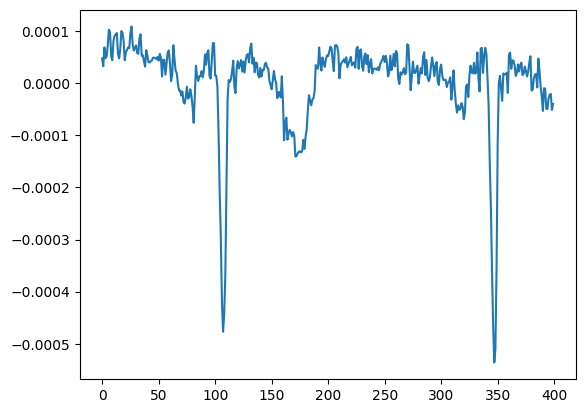

In [13]:
plt.plot(ECG[:400])

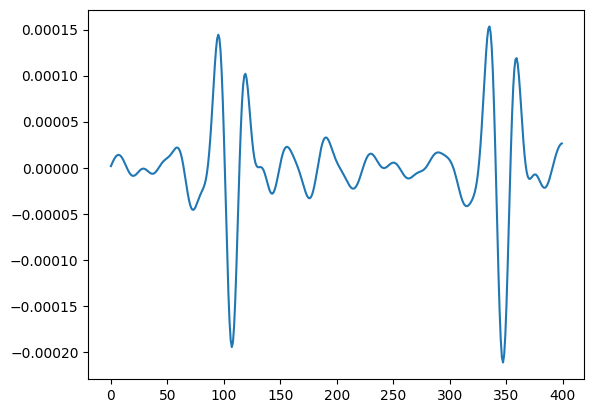

In [14]:
plt.plot(ECG_BP[:400])

In [15]:
ECG_df = pt.Differentiate(ECG_BP)

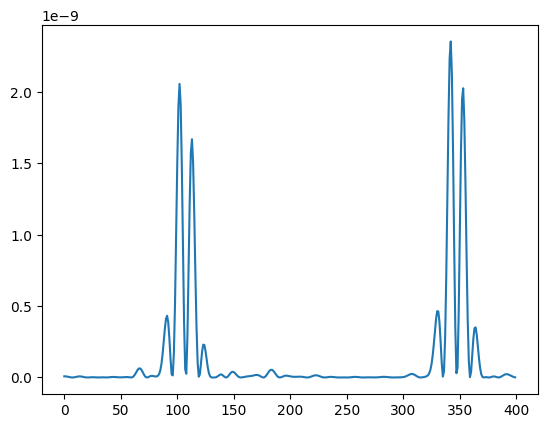

In [16]:
plt.plot(ECG_df[:400])

In [17]:
ECG_ma = pt.MovingAverage(ECG_df)

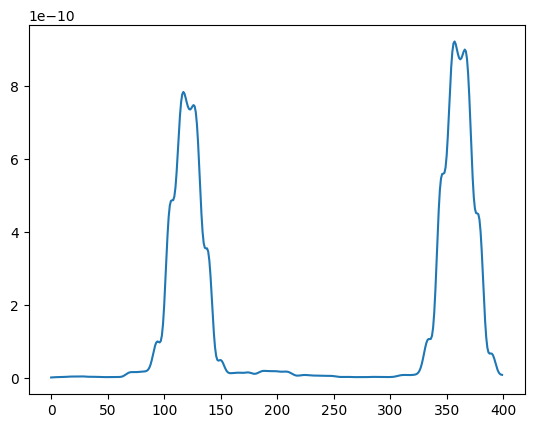

In [18]:
plt.plot(ECG_ma[:400])

In [19]:
R_peaks = pt.QRSpeaks(ECG_ma, 256)

In [20]:
R_peaks[:10]

array([ 117,  357,  600, 1096, 1341, 1588, 1833, 2081, 2330, 2571],
      dtype=int64)

In [49]:
HRV = np.diff(R_peaks)

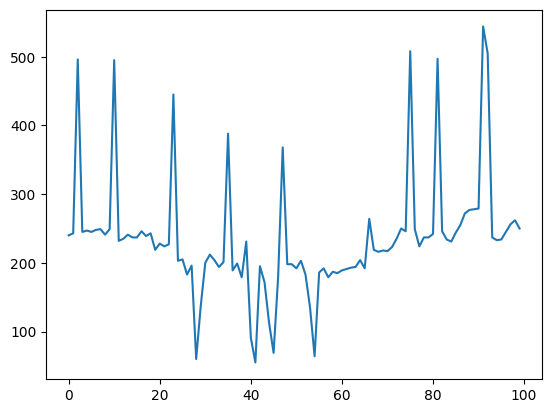

In [22]:
plt.plot(HRV[:100])

In [23]:
def get_time_f(arr, Fs=256):
    df_new = []
    for item in arr:
        df_new.append([item[0] * Fs, item[1]* Fs, item[2]])
    # return [arr[0]*Fs, arr[1]*Fs, arr[2]]
    return df_new

In [24]:
fixedtime_df = get_time_f(df)

In [25]:
df[:5]

[[420, 600, 'Sleep stage N2'],
 [600, 780, 'Sleep stage N2'],
 [1350, 1530, 'Sleep stage N3'],
 [1530, 1710, 'Sleep stage N3'],
 [1710, 1890, 'Sleep stage N3']]

In [26]:
fixedtime_df[:5]

[[107520, 153600, 'Sleep stage N2'],
 [153600, 199680, 'Sleep stage N2'],
 [345600, 391680, 'Sleep stage N3'],
 [391680, 437760, 'Sleep stage N3'],
 [437760, 483840, 'Sleep stage N3']]

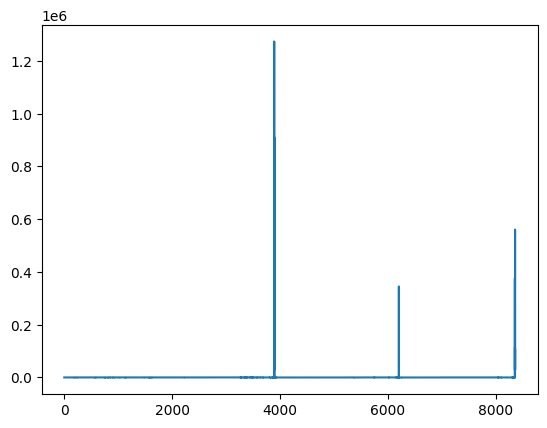

In [27]:
plt.plot(HRV)

In [28]:
print(f'Max : {np.max(HRV)} , Min : {np.min(HRV)} , Mean : {np.mean(HRV)} , Std : {np.std(HRV)}')

Max : 1273837 , Min : 51 , Mean : 742.4796650717703 , Std : 20406.256745997234


C:\Users\Mreza\AppData\Local\Temp\ipykernel_12292\3652483723.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(HRV)


<AxesSubplot: ylabel='Density'>

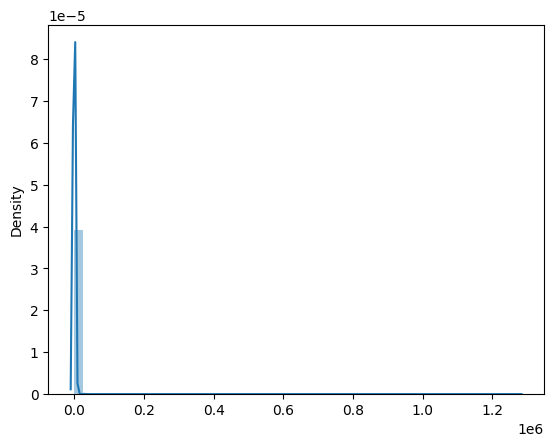

In [29]:
import seaborn as sns

sns.distplot(HRV)

# Split R Peaks by Annotation

In [30]:
print(len(R_peaks))
R_peaks[:10]

8361


array([ 117,  357,  600, 1096, 1341, 1588, 1833, 2081, 2330, 2571],
      dtype=int64)

In [44]:
def splitter(annot, rpeaks = R_peaks):
    points = []
    start = annot[0]
    end = annot[1]
    for i in rpeaks:
        if i >= start and i <= end:
            points.append(i)
        else:
            pass
    return points

In [45]:
# del pts

In [37]:
pts = splitter(fixedtime_df[0])

In [ ]:
for item in fixedtime_df:
    pts

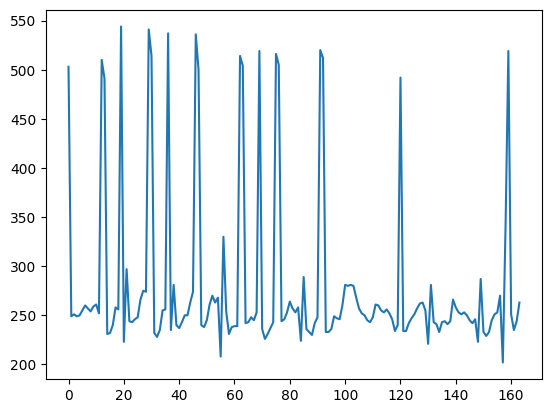

In [33]:
plt.plot(np.diff(pts))

In [ ]:
# print(list(R_peaks))

In [ ]:
for i in range(len(fixedtime_df)):
    pts = splitter(fixedtime_df[i])
    
    # plt.plot(np.diff(pts))
    # plt.savefig(f'hrv{i}.png')
    # plt.show()
    # print(pts)
    if len(pts) == 0:
        print('empty')
    else:
        print('no')

In [71]:
print(fixedtime_df[15])
print(fixedtime_df[16])
print(fixedtime_df[17])

print(splitter(fixedtime_df[15]))
print(splitter(fixedtime_df[16]))
print(splitter(fixedtime_df[17]))

[1297920, 1344000, 'Sleep stage N2']
[1374720, 1420800, 'Sleep stage N2']
[1420800, 1466880, 'Sleep stage N2']
[]
[]
[]


In [72]:
print(f'Max : {np.max(R_peaks)} , Min : {np.min(R_peaks)} , Mean : {np.mean(R_peaks)} , Std : {np.std(R_peaks)}')

Max : 6207247 , Min : 117 , Mean : 2589648.102499701 , Std : 1958796.3607720244


In [75]:
print([R_peaks>1374720])

[array([False, False, False, ...,  True,  True,  True])]


In [78]:
a = [i for i in R_peaks if i>1374720]
a[:5]

[2306755, 2336190, 3246336, 3275770, 3933210]

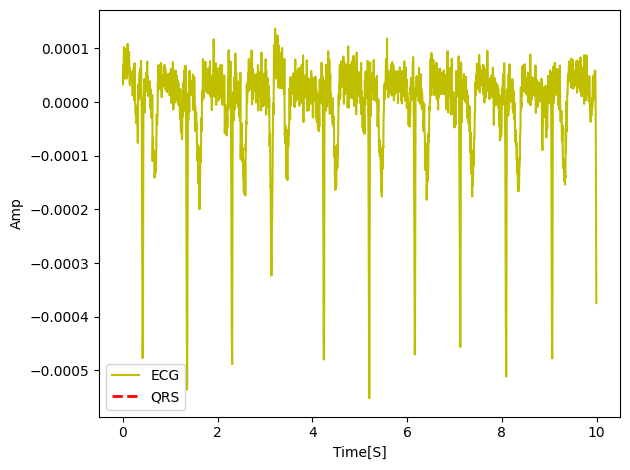

In [92]:
Fs=256
QRS = R_peaks
ECG_raw = ECG
QRS = QRS[70*Fs:80*Fs]
fig = plt.figure(frameon="False") 
plt.plot(np.arange(ECG_raw[:10*Fs].shape[0])/Fs,ECG_raw[:10*Fs],color='y',label='ECG')
plt.vlines(x=(QRS-15)/Fs,ymin=np.min(ECG_raw[:10*Fs]),ymax=np.max(ECG_raw[:10*Fs]),linestyles='dashed',color='r', label='QRS',linewidth=2.0)
plt.ylabel('Amp'); plt.xlabel('Time[S]'); plt.legend()
plt.tight_layout(); plt.show()

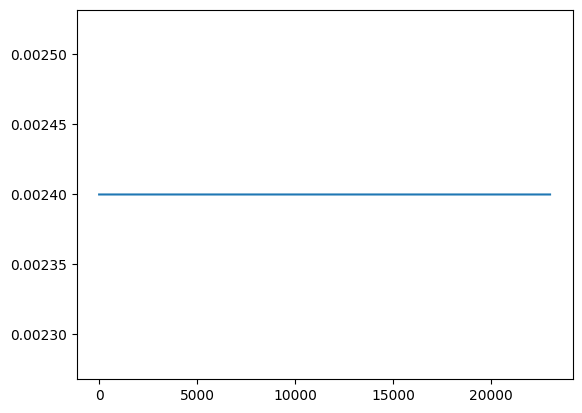

In [84]:
plt.plot(ECG[1377000:1400000])
# 14000000

In [ ]:
fixedtime_df

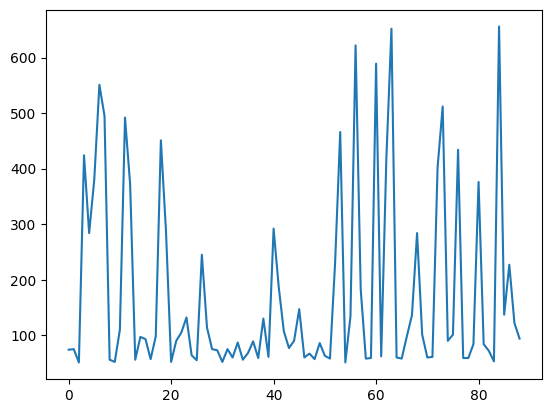

In [60]:
plt.plot(np.diff(R_peaks[3800:3890]))

In [55]:
print(np.where(R_peaks == 1019167))

(array([3812], dtype=int64),)


In [61]:
R_peaks[3790:3800]

array([1014688, 1014780, 1014853, 1014931, 1015002, 1015058, 1015461,
       1015836, 1015940, 1016002], dtype=int64)

In [63]:
np.diff(R_peaks[3790:3900])

array([     92,      73,      78,      71,      56,     403,     375,
           104,      62,     121,      74,      75,      51,     424,
           284,     380,     551,     495,      56,      52,     110,
           492,     372,      56,      97,      93,      57,      98,
           451,     287,      52,      90,     105,     132,      64,
            55,     245,     114,      75,      73,      52,      75,
            60,      87,      56,      68,      89,      59,     130,
            61,     292,     187,     107,      77,      90,     147,
            60,      67,      57,      86,      63,      58,     230,
           466,      51,     134,     622,     183,      58,      59,
           589,      62,     417,     652,      60,      58,      98,
           136,     284,     101,      60,      61,     402,     512,
            90,     101,     434,      59,      59,      84,     376,
            84,      72,      53,     656,     137,     227,     122,
            94,    1

# Test base for reverse peak

In [112]:
def BandPassECG(file,Fs):
    '''
    This function takes in a "path" and imports the ECG signal in .mat format
    '''
    import mne
    from scipy import signal
    # Import the signal
    data = mne.io.read_raw_edf(file)
    raw_data = data.get_data()
    ECG    = raw_data[7]
    # Implementing the Butterworth BP filter
    W1     = 5*2/Fs                                    # --> 5 Hz cutt-off (high-pass) and Normalize by Sample Rate
    W2     = 15*2/Fs                                   # --> 15 Hz cutt-off (low-pass) and Normalize by Sample Rate
    b, a   = signal.butter(4, [W1,W2], 'bandpass')     # --> create b,a coefficients , since this is IIR we need both b and a coefficients
    ECG    = -1 * np.asarray(ECG)                           # --> let's convert the ECG to a numpy array, this makes it possible to perform vector operations 
    ECG    = np.squeeze(ECG)                           # --> squeeze
    ECG_BP = signal.filtfilt(b,a,ECG)    # --> filtering: note we use a filtfilt that compensates for the delay
    return ECG_BP,ECG


In [113]:
ECG_BP,ECG = BandPassECG('SN036.edf',256)

Extracting EDF parameters from H:\Data\haaglanden-medisch-centrum-sleep-staging-database-1.1\recordings\SN036.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [114]:
# ECG = -1 * ECG
# ECP_BP = -1 * ECG_BP

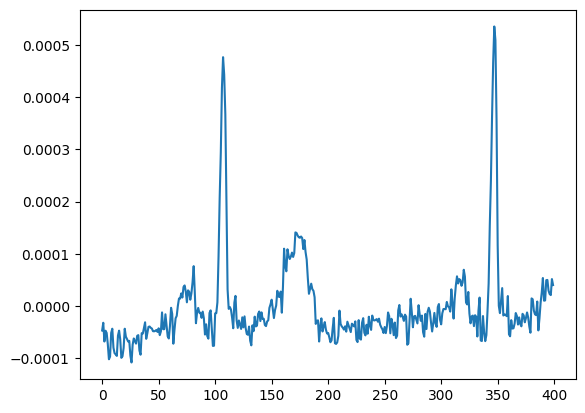

In [115]:
plt.plot(ECG[:400])

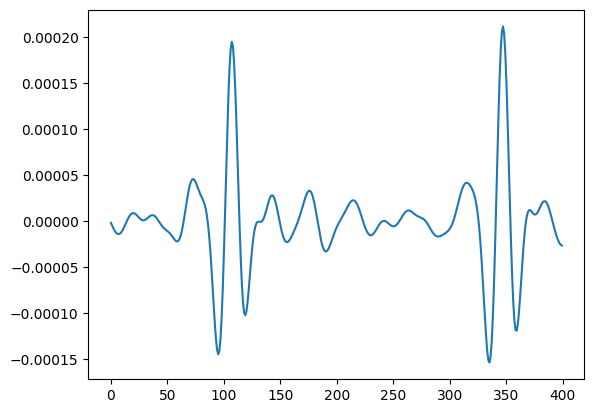

In [116]:
plt.plot(ECG_BP[:400])

In [117]:
ECG_df = pt.Differentiate(ECG_BP)

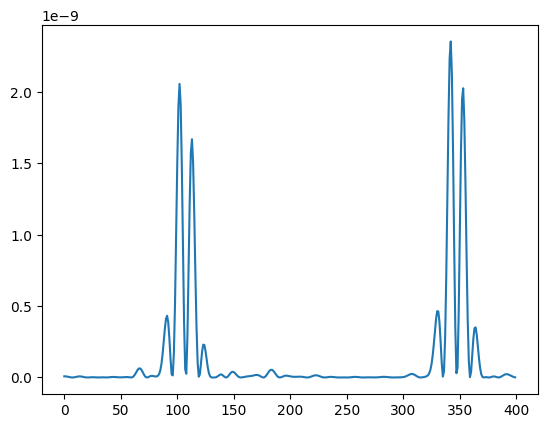

In [118]:
plt.plot(ECG_df[:400])

In [119]:
ECG_ma = pt.MovingAverage(ECG_df)

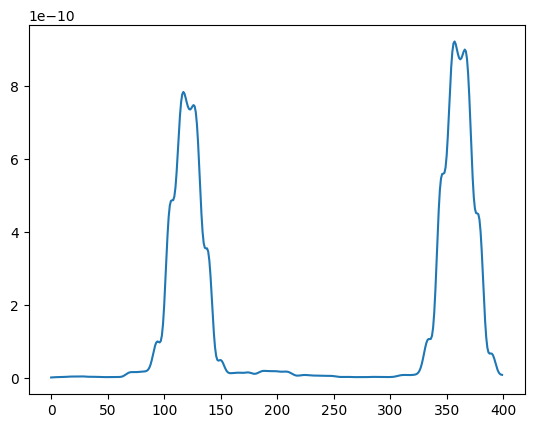

In [120]:
plt.plot(ECG_ma[:400])

In [121]:
R_peaks = pt.QRSpeaks(ECG_ma, 256)

In [122]:
R_peaks[:10]

array([ 117,  357,  600, 1096, 1341, 1588, 1833, 2081, 2330, 2571],
      dtype=int64)

In [104]:
HRV = np.diff(R_peaks)

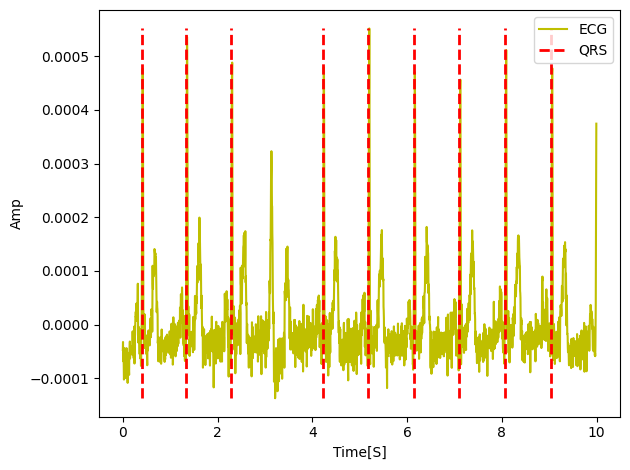

In [123]:
Fs=256
QRS = R_peaks
ECG_raw = ECG
QRS = QRS[QRS<=10*Fs]
fig = plt.figure(frameon="False") 
plt.plot(np.arange(ECG_raw[:10*Fs].shape[0])/Fs,ECG_raw[:10*Fs],color='y',label='ECG')
plt.vlines(x=(QRS-15)/Fs,ymin=np.min(ECG_raw[:10*Fs]),ymax=np.max(ECG_raw[:10*Fs]),linestyles='dashed',color='r', label='QRS',linewidth=2.0)
plt.ylabel('Amp'); plt.xlabel('Time[S]'); plt.legend()
plt.tight_layout(); plt.show()